In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


df_listings = pd.read_csv('./listings.csv')
df_listings.head()
df_reviews = pd.read_csv('./reviews.csv')
df_reviews.head()
df_calendar= pd.read_csv('./calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [11]:
no_nulls=set(df_listings.columns[df_listings.isnull().mean() == 0 ])
print(no_nulls)

{'city', 'accommodates', 'cancellation_policy', 'guests_included', 'require_guest_profile_picture', 'picture_url', 'host_id', 'require_guest_phone_verification', 'price', 'longitude', 'requires_license', 'has_availability', 'smart_location', 'scrape_id', 'maximum_nights', 'room_type', 'name', 'country', 'country_code', 'experiences_offered', 'listing_url', 'host_url', 'number_of_reviews', 'description', 'availability_60', 'is_location_exact', 'jurisdiction_names', 'last_scraped', 'market', 'availability_90', 'instant_bookable', 'calendar_last_scraped', 'amenities', 'neighbourhood_cleansed', 'extra_people', 'minimum_nights', 'bed_type', 'street', 'calendar_updated', 'availability_30', 'id', 'neighbourhood_group_cleansed', 'state', 'calculated_host_listings_count', 'availability_365', 'latitude', 'host_verifications'}


In [12]:
#The listing with most reviews 
listings=df_reviews['listing_id'].value_counts().reset_index()
listings.rename(columns={"index":"id",'listing_id':'count'},inplace=True)
print(listings)
df2=df_listings[['id','name']]
print(df2)

result=pd.merge(df2,listings,on="id")
print(result.sort_values(by=['count'], ascending=False))

           id  count
0      208356    474
1      365550    466
2       25002    404
3       47196    353
4       63308    320
...       ...    ...
3186  4825073      1
3187  6392029      1
3188   716829      1
3189  8327083      1
3190  8350401      1

[3191 rows x 2 columns]
            id                                 name
0       241032         Stylish Queen Anne Apartment
1       953595   Bright & Airy Queen Anne Apartment
2      3308979  New Modern House-Amazing water view
3      7421966                   Queen Anne Chateau
4       278830       Charming craftsman 3 bdm house
...        ...                                  ...
3813   8101950   3BR Mountain View House in Seattle
3814   8902327    Portage Bay View!-One Bedroom Apt
3815  10267360    Private apartment view of Lake WA
3816   9604740    Amazing View with Modern Comfort!
3817  10208623            Large Lakefront Apartment

[3818 rows x 2 columns]
           id                                 name  count
1225   208356   

In [13]:
#Max Price variation
# lets remove the null values first
df_price=df_calendar[df_calendar['price'].notna()]
print(df_calendar.shape[0])
print(df_price.shape[0])

#print(df_price_most_busy.head())
df_price=df_price.drop(['available', 'listing_id'], axis=1)
df_price['price'] = df_price['price'].str.replace('$','')
df_price['price'] = df_price['price'].str.replace(',','')

df_price[['price']] = df_price[['price']].apply(pd.to_numeric)
df_price=df_price.sort_values(by=['date'], ascending=True)
df_price_most_busy=df_price.loc[df_price.groupby('date')['price'].idxmax()]
print(df_price_most_busy)
df_price_most_busy.plot(x="date",y="price", kind="bar",figsize=(200, 100),color='red')
#change bar to lne to see another variation
plt.xlabel("Date Range")
plt.ylabel("Price ( $)")
plt.legend(labelspacing = 13)
plt.show()

1393570
934542


<ipython-input-13-0e7c7d9b94c9>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_price['price'] = df_price['price'].str.replace('$','')


               date   price
730      2016-01-04   975.0
1256696  2016-01-05   950.0
1256697  2016-01-06   950.0
1256698  2016-01-07   950.0
1256699  2016-01-08   950.0
...             ...     ...
1090     2016-12-29  1650.0
1091     2016-12-30  1650.0
1092     2016-12-31  1650.0
1139893  2017-01-01  1000.0
919434   2017-01-02  1000.0

[365 rows x 2 columns]


In [14]:
#most busisiest day
df_busy=df_calendar[df_calendar['price'].isna()]
#df_busy.head()
df_most_busy=df_busy['date'].value_counts()
print(df_most_busy)
df_most_busy.plot(figsize=(200, 100),color='blue')
#df_price_most_busiest.plot(x="date",y="price", kind="bar",figsize=(200, 100),color='red')

2016-01-04    2083
2016-01-07    2042
2016-01-08    2036
2016-01-06    1992
2016-01-09    1962
              ... 
2016-12-28     985
2016-12-29     983
2016-12-30     978
2016-12-31     959
2017-01-01     896
Name: date, Length: 365, dtype: int64


<AxesSubplot:>

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64


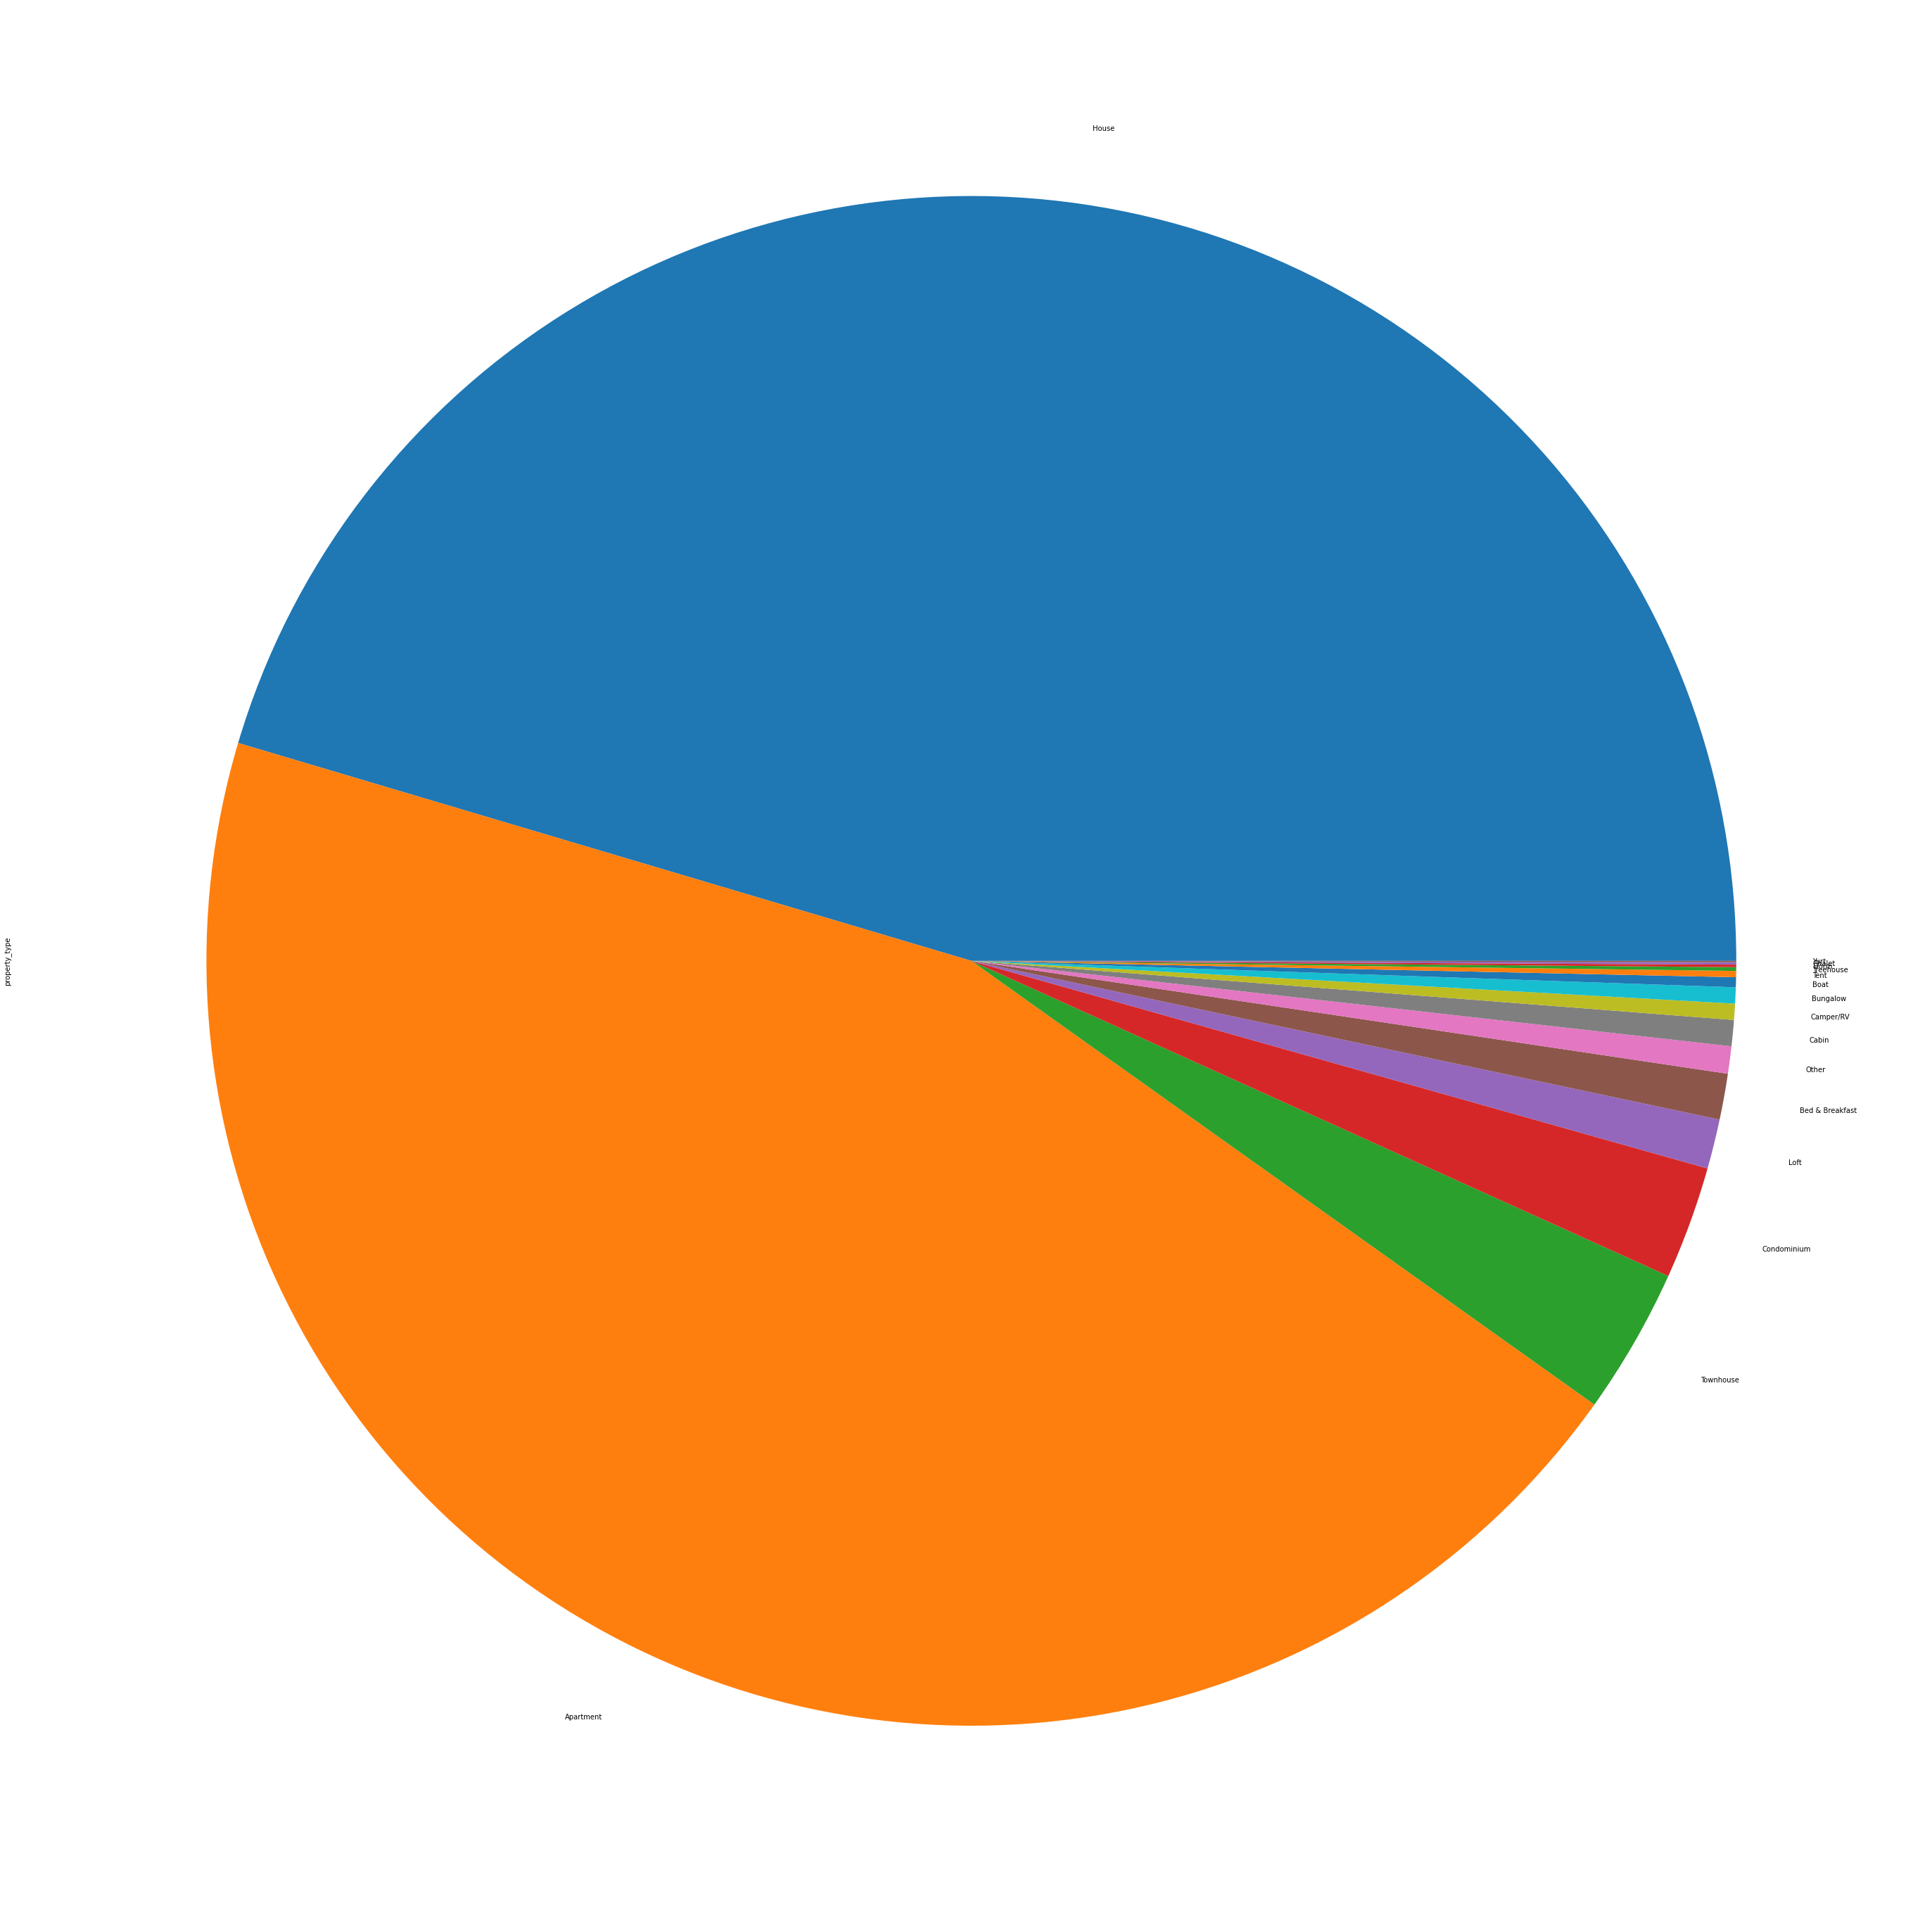

In [9]:
#taking stock of property type
df_listings_propety_type_count=df_listings['property_type'].value_counts()
print(df_listings_propety_type_count)
df_listings_propety_type_count.plot(kind="pie",figsize=(50,50))
plt.show()